<h1>Импорт библиотек

In [50]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [18]:
def sum_prod(X, V):
    result = 0
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result

def test():
    # Тест 1: Простое умножение
    X1 = [np.array([[1, 2], [3, 4]])]
    V1 = [np.array([[1], [2]])]
    assert np.array_equal(sum_prod(X1, V1), np.array([[5], [11]])), "Ошибка в тесте 1"

    # Тест 2: Сложение двух произведений
    X2 = [
        np.array([[1, 0], [0, 1]]),
        np.array([[2, 0], [0, 2]])
    ]
    V2 = [
        np.array([[1], [0]]),
        np.array([[0], [1]])
    ]
    assert np.array_equal(sum_prod(X2, V2), np.array([[1], [2]])), "Ошибка в тесте 2"

    # Тест 3: Нулевые матрицы
    X3 = [np.zeros((2, 2)), np.zeros((2, 2))]
    V3 = [np.zeros((2, 1)), np.zeros((2, 1))]
    assert np.array_equal(sum_prod(X3, V3), np.zeros((2, 1))), "Ошибка в тесте 3"

    print("Все тесты успешно пройдены!")

# Запускаем тесты
test()

Все тесты успешно пройдены!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [21]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(np.int8)

def test():
    # Тест 1: Проверка значения по умолчанию (0.5)
    M1 = np.array([[0.4, 0.5, 0.6], 
                   [0.49, 0.51, 0.9]])
    expected1 = np.array([[0, 0, 1],
                         [0, 1, 1]])
    assert np.array_equal(binarize(M1), expected1)

    # Тест 2: Пользовательский threshold (0.3)
    M2 = np.array([[0.2, 0.3, 0.31],
                   [0.29, 0.4, 0.5]])
    expected2 = np.array([[0, 0, 1],
                         [0, 1, 1]])
    assert np.array_equal(binarize(M2, 0.3), expected2)

    # Тест 3: Граничный случай (все значения равны threshold)
    M3 = np.array([[0.5, 0.5],
                   [0.5, 0.5]])
    expected3 = np.array([[0, 0],
                         [0, 0]])
    assert np.array_equal(binarize(M3), expected3)

    # Тест 4: Отрицательные значения (threshold=0)
    M4 = np.array([[-0.1, 0.0, 0.1],
                   [-1.0, 1.0, 0.5]])
    expected4 = np.array([[0, 0, 1],
                         [0, 1, 1]])
    assert np.array_equal(binarize(M4, 0.0), expected4)

    # Тест 5: Целые числа (threshold=2)
    M5 = np.array([[1, 2, 3],
                   [4, 5, 6]])
    expected5 = np.array([[0, 0, 1],
                         [1, 1, 1]])
    assert np.array_equal(binarize(M5, 2), expected5)

    print("Все тесты пройдены!")

test()

Все тесты пройдены!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [26]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]  # Используем транспонирование для работы со столбцами

def test():
    # Тест 1: Проверка для строк
    mat1 = np.array([
        [1, 2, 2, 3],
        [4, 4, 5, 5],
        [6, 7, 7, 8]
    ])
    row_result = unique_rows(mat1)
    assert np.array_equal(row_result[0], np.array([1, 2, 3]))
    assert np.array_equal(row_result[1], np.array([4, 5]))
    assert np.array_equal(row_result[2], np.array([6, 7, 8]))

    # Тест 2: Проверка для столбцов
    col_result = unique_columns(mat1)
    assert np.array_equal(col_result[0], np.array([1, 4, 6]))
    assert np.array_equal(col_result[1], np.array([2, 4, 7]))
    assert np.array_equal(col_result[3], np.array([3, 5, 8]))

    # Тест 3: Матрица с одним элементом
    mat2 = np.array([[5]])
    assert np.array_equal(unique_rows(mat2)[0], np.array([5]))
    assert np.array_equal(unique_columns(mat2)[0], np.array([5]))

    print("Все тесты пройдены успешно!")

# Запуск тестов
test()

Все тесты пройдены успешно!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Матрица:
[[ 0.06856297 -1.06230371  0.47359243]
 [-0.91942423  1.54993441 -0.78325329]
 [-0.32206152  0.81351722 -1.23086432]]

 [-0.17338277 -0.05091437 -0.24646954]
Дисперсия строк: [0.4224317  1.28444883 0.69943972]

 [-0.39097426  0.43371597 -0.51350839]
Дисперсия столбцов: [0.16506094 1.20942249 0.52057662]


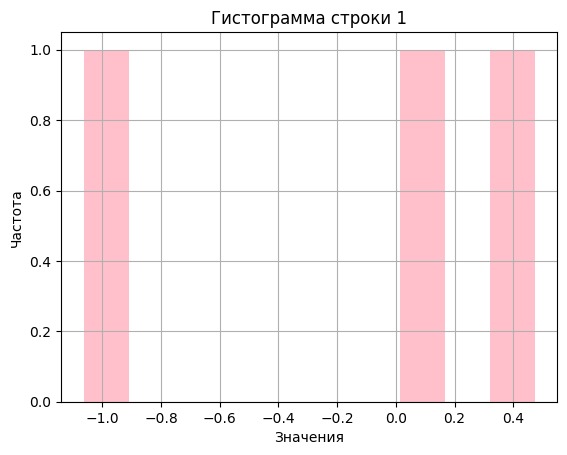

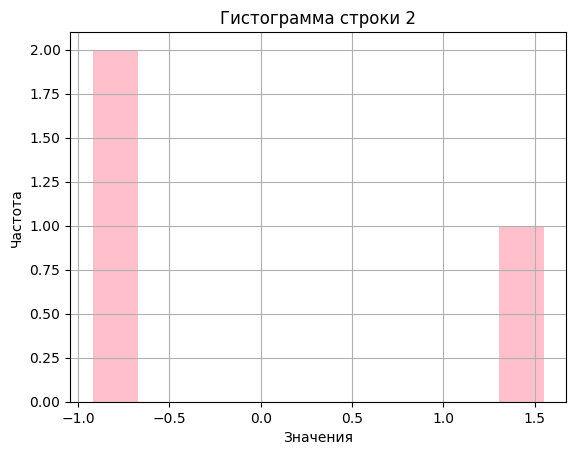

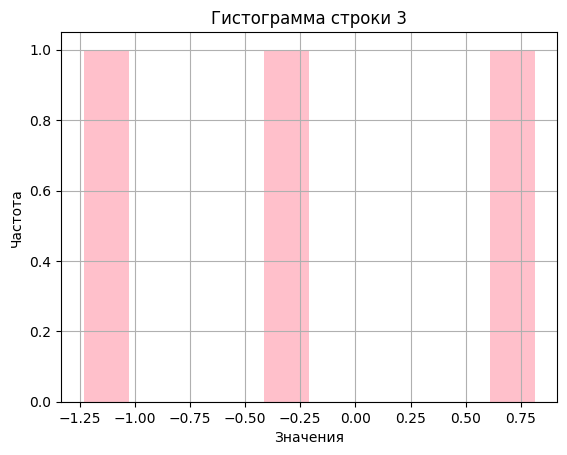

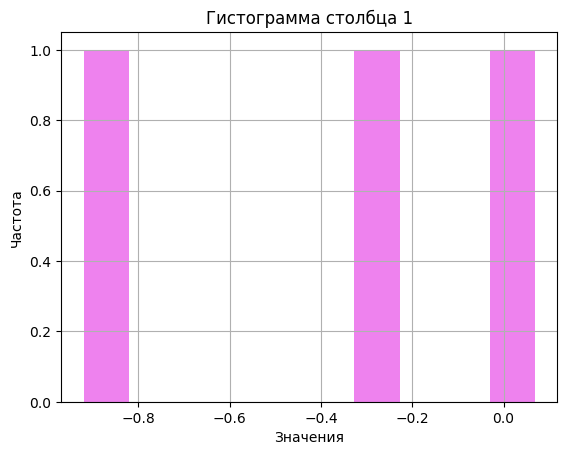

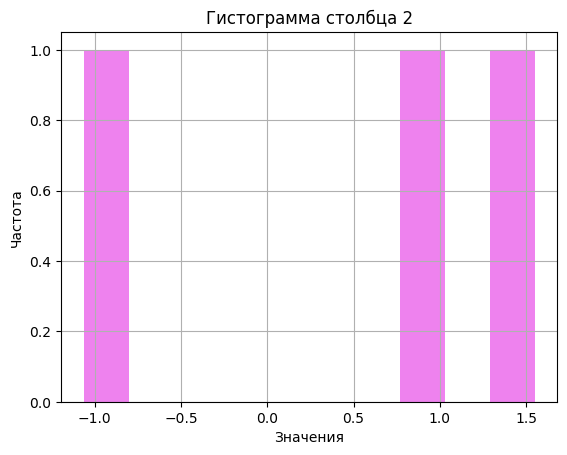

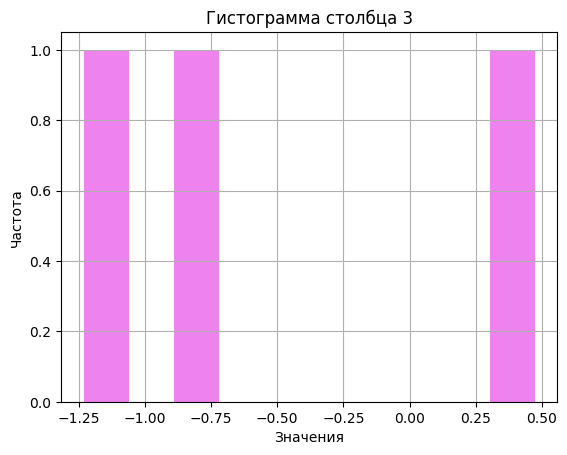

In [33]:
def func(m, n):
    matrix = np.random.normal(size=(m, n))
    
    # Вычисление мат. ожидания и дисперсии для строк
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    
    # Вычисление мат. ожидания и дисперсии для столбцов
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    
    # Вывод результатов
    print("Матрица:")
    print(matrix)
    print("\nМатематическое ожидание строк:", row_means)
    print("Дисперсия строк:", row_vars)
    print("\nМатематическое ожидание столбцов:", col_means)
    print("Дисперсия столбцов:", col_vars)
    
    # Построение гистограмм для строк
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=10, color='pink')
        plt.title(f'Гистограмма строки {i+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
    
    # Построение гистограмм для столбцов
    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, color='violet')
        plt.title(f'Гистограмма столбца {j+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

# Пример использования функции
func(3, 3)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [37]:
def chess(m, n, a, b):
    matrix = [[a if (i + j) % 2 == 0 else b for j in range(n)] for i in range(m)]
    return matrix
    
def test_chessboard_matrix():
# Тест 1: Матрица 2x2 с числами 0 и 1
    assert chess(2, 2, 0, 1) == [[0, 1], [1, 0]]
    
# Тест 2: Матрица 3x3 с числами 5 и 10
    assert chess(3, 3, 5, 10) == [
        [5, 10, 5],
        [10, 5, 10],
        [5, 10, 5]
    ]
    
# Тест 3: Матрица 1x1 (один элемент)
    assert chess(1, 1, 7, 3) == [[7]]
    
# Тест 4: Матрица 2x3 с числами -1 и 1
    assert chess(2, 3, -1, 1) == [
        [-1, 1, -1],
        [1, -1, 1]
    ]
      
# Тест 5: Матрица 4x4 с одинаковыми числами (все элементы = 2)
    assert chess(4, 4, 2, 2) == [
        [2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2]
    ]
    
    print("Все тесты прошли успешно!")

test_chessboard_matrix()

Все тесты прошли успешно!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

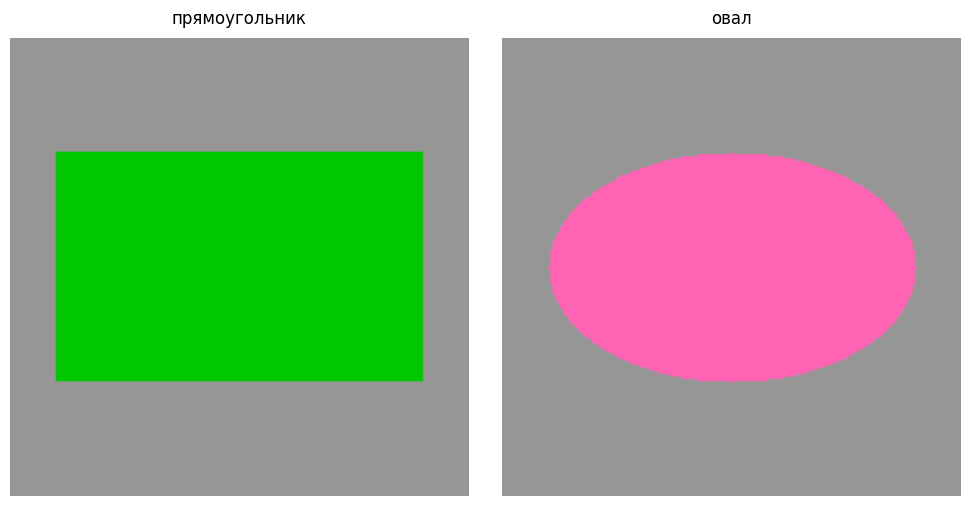

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Создаём изображение с фоном
    image = np.full((n, m, 3), background_color, dtype=np.uint8)
    
    # Координаты прямоугольника
    x0 = (m - a) // 2
    y0 = (n - b) // 2
    x1 = x0 + a
    y1 = y0 + b
    image[y0:y1, x0:x1] = rectangle_color
    
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.full((n, m, 3), background_color, dtype=np.uint8)
    
    # Центр изображения
    x0 = m // 2
    y0 = n // 2
    
    # Сетка координат
    y, x = np.ogrid[:n, :m]
    
    # Уравнение эллипса
    distances = ((x - x0)/a)**2 + ((y - y0)/b)**2
    image[distances <= 1] = ellipse_color
    
    return image

def test():
    #Цвета:
    bg_color = (150, 150, 150)  # серый фон
    rect_color = (0, 200, 0)    # ярко-зелёный прямоугольник
    oval_color = (255, 100, 180) # розовый овал
    
    #Тест прямоугольника
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    rect_img = draw_rectangle(160, 100, 200, 200, rect_color, bg_color)
    plt.imshow(rect_img)
    plt.title("прямоугольник", pad=10)
    plt.axis('off')
    
    #Тест овала с полуосями 80 и 50
    plt.subplot(1, 2, 2)
    oval_img = draw_ellipse(80, 50, 200, 200, oval_color, bg_color)
    plt.imshow(oval_img)
    plt.title("овал", pad=10)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

test()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [46]:
def analyze_time_series(time_series, window_size):


    # Основные статистики
    stats = {
        'mean': round(float(np.mean(time_series)), 4),
        'variance': round(float(np.var(time_series)), 4),
        'std_dev': round(float(np.std(time_series)), 4)
    }
    
    # Поиск экстремумов
    extrema = {
        'peaks': [i for i in range(1, len(time_series)-1) 
                 if time_series[i] > time_series[i-1] and time_series[i] > time_series[i+1]],
        'valleys': [i for i in range(1, len(time_series)-1) 
                  if time_series[i] < time_series[i-1] and time_series[i] < time_series[i+1]]
    }

    moving_avg = [round(float(x), 4) for x in 
                 np.convolve(time_series, np.ones(window_size)/window_size, mode='valid')]
    
    return {
        'statistics': stats,
        'extrema': extrema,
        'moving_average': moving_avg
    }

#Тест
sample_data = [1, 3, 7, 1, 2, 0, 4, 2, 3]
analysis = analyze_time_series(sample_data, window_size=3)

print("Результаты анализа:")
print(f"Среднее: {analysis['statistics']['mean']}")
print(f"Дисперсия: {analysis['statistics']['variance']}")
print(f"Стандартное отклонение: {analysis['statistics']['std_dev']}")
print(f"\nЛокальные максимумы: {analysis['extrema']['peaks']}")
print(f"Локальные минимумы: {analysis['extrema']['valleys']}")
print(f"\nСкользящее среднее (окно=3): {analysis['moving_average']}")

Результаты анализа:
Среднее: 2.5556
Дисперсия: 3.8025
Стандартное отклонение: 1.95

Локальные максимумы: [2, 4, 6]
Локальные минимумы: [3, 5, 7]

Скользящее среднее (окно=3): [3.6667, 3.6667, 3.3333, 1.0, 2.0, 2.0, 3.0]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [53]:
def one_hot_encode(labels):
    labels = np.array(labels)
    num_classes = np.max(labels) + 1
    
    encoded = np.zeros((len(labels), num_classes), dtype=int)
    
    for i, label in enumerate(labels):
        encoded[i, label] = 1
    
    # Преобразуем numpy.int32 в обычные int
    return [[int(x) for x in row] for row in encoded]

# Пример использования
result = one_hot_encode([0, 2, 3, 0])
print(result)

[[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]
